In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!mkdir -p /content/drive/MyDrive/Capstone_Project/chest_xray


In [ ]:
!rm -rf /content/drive/MyDrive/Capstone_Project/chest_xray


In [ ]:
!mkdir -p /content/drive/MyDrive/Capstone_Project/chest_xray


In [ ]:
import zipfile
import os

drive_path = "/content/drive/MyDrive/Capstone_Project"
target_path = os.path.join(drive_path, "chest_xray")

# Unzip each into the chest_xray folder
zips = ['train.zip', 'test.zip', 'val.zip']
for z in zips:
    with zipfile.ZipFile(os.path.join(drive_path, z), 'r') as zip_ref:
        zip_ref.extractall(target_path)

print("✅ All files extracted cleanly into chest_xray/")


✅ All files extracted cleanly into chest_xray/


In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import random


In [ ]:
# Define base path to dataset (Colab location)
base_path = '/content/chest_xray'

# Subfolders
train_path = os.path.join(base_path, 'train')
test_path = os.path.join(base_path, 'test')
val_path = os.path.join(base_path, 'val')


In [ ]:
import os
print(os.listdir(train_path))

['NORMAL', 'PNEUMONIA']


In [ ]:
def count_images(folder_path):
    counts = {}
    for category in ['NORMAL', 'PNEUMONIA']:
        path = os.path.join(folder_path, category)
        counts[category] = len(os.listdir(path))
    return counts

# Get counts
train_counts = count_images(train_path)
val_counts = count_images(val_path)
test_counts = count_images(test_path)

print("Train:", train_counts)
print("Validation:", val_counts)
print("Test:", test_counts)


Train: {'NORMAL': 1341, 'PNEUMONIA': 3875}
Validation: {'NORMAL': 8, 'PNEUMONIA': 8}
Test: {'NORMAL': 234, 'PNEUMONIA': 390}


/tmp/ipython-input-12-3706417292.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(train_counts.keys()), y=list(train_counts.values()), palette='Set2')


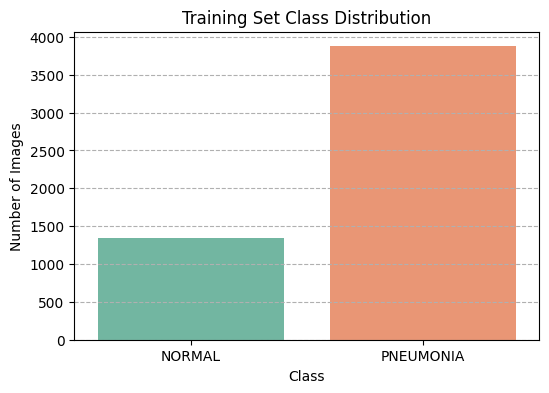

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(x=list(train_counts.keys()), y=list(train_counts.values()), palette='Set2')
plt.title('Training Set Class Distribution')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.grid(axis='y', linestyle='--')
plt.show()


Sample NORMAL X-rays:


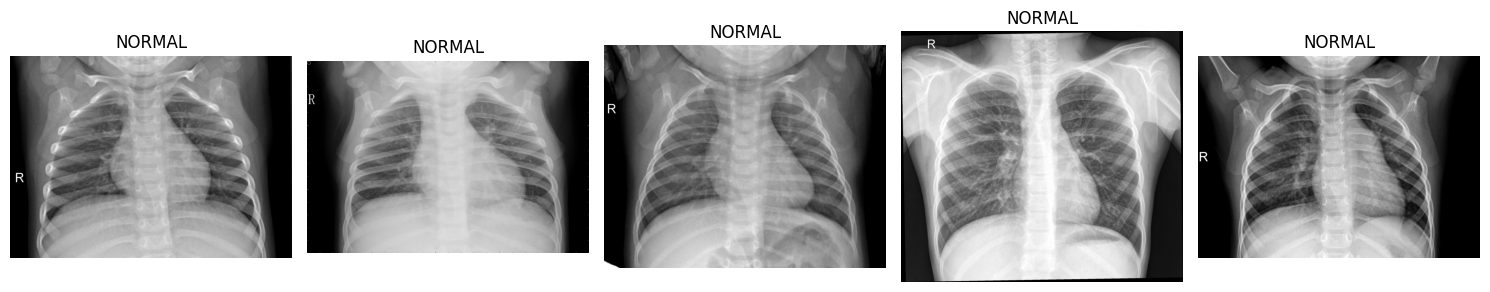

Sample PNEUMONIA X-rays:


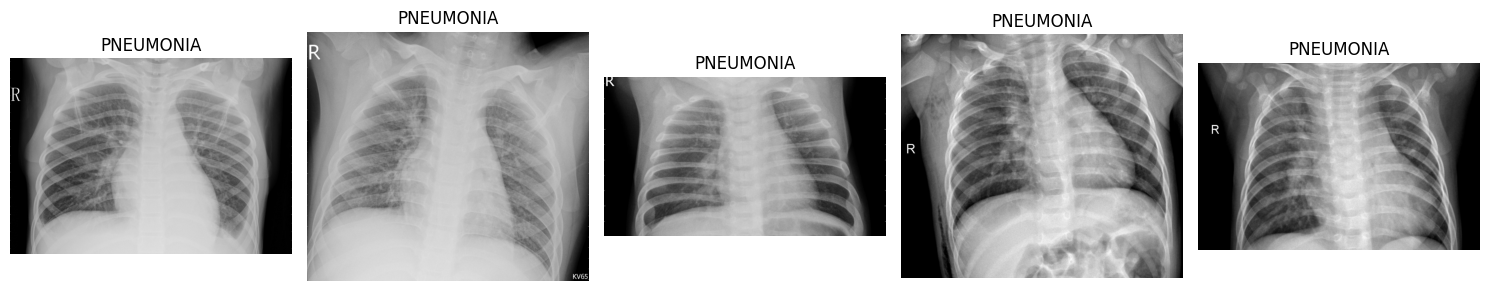

In [ ]:
def show_sample_images(class_name='NORMAL', dataset='train', num_images=5):
    path = os.path.join(base_path, dataset, class_name)
    image_files = os.listdir(path)
    sample_files = random.sample(image_files, num_images)

    plt.figure(figsize=(15, 5))
    for i, file in enumerate(sample_files):
        img_path = os.path.join(path, file)
        img = mpimg.imread(img_path)
        plt.subplot(1, num_images, i+1)
        plt.imshow(img, cmap='gray')
        plt.title(f"{class_name}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Show normal
print("Sample NORMAL X-rays:")
show_sample_images('NORMAL', 'train')

# Show pneumonia
print("Sample PNEUMONIA X-rays:")
show_sample_images('PNEUMONIA', 'train')


Image shape: (950, 1264)


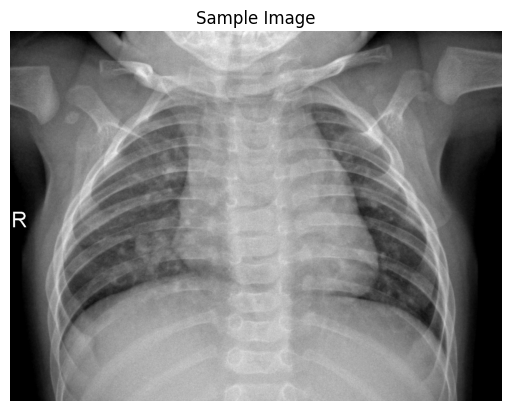

In [ ]:
# Check shape of one image
example_path = os.path.join(train_path, 'NORMAL', os.listdir(os.path.join(train_path, 'NORMAL'))[0])
example_image = mpimg.imread(example_path)

print("Image shape:", example_image.shape)
plt.imshow(example_image, cmap='gray')
plt.title("Sample Image")
plt.axis('off')
plt.show()


In [ ]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
base_path = '/content/drive/MyDrive/Capstone_Project/chest_xray'

train_dir = os.path.join(base_path, 'train')
val_dir = os.path.join(base_path, 'val')
test_dir = os.path.join(base_path, 'test')


In [ ]:
IMG_SIZE = (150, 150)
BATCH_SIZE = 32

train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True
)

val_gen = ImageDataGenerator(rescale=1./255)
test_gen = ImageDataGenerator(rescale=1./255)


In [ ]:
!ls "/content/drive/MyDrive/Capstone_Project/chest_xray/train"


NORMAL	PNEUMONIA


In [ ]:
train_data = train_gen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

val_data = val_gen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

test_data = test_gen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
print("Class Indices:", train_data.class_indices)


Class Indices: {'NORMAL': 0, 'PNEUMONIA': 1}


In [ ]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10,
    steps_per_epoch=len(train_data),
    validation_steps=len(val_data)
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 958s 6s/step - accuracy: 0.8396 - loss: 0.3798 - val_accuracy: 0.8125 - val_loss: 0.4327
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 312s 2s/step - accuracy: 0.9531 - loss: 0.1374 - val_accuracy: 0.6875 - val_loss: 0.9673
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 304s 2s/step - accuracy: 0.9631 - loss: 0.1042 - val_accuracy: 1.0000 - val_loss: 0.1475
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 313s 2s/step - accuracy: 0.9671 - loss: 0.0820 - val_accuracy: 0.9375 - val_loss: 0.1645
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 305s 2s/step - accuracy: 0.9759 - loss: 0.0760 - val_accuracy: 1.0000 - val_loss: 0.0772
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 330s 2s/step - accuracy: 0.9774 - loss: 0.0643 - val_accuracy: 1.0000 - val_loss: 0.0666
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 317s 2s/step - accuracy: 0.9817 - loss: 0.0574 - val_accuracy: 0.8750 - val_loss: 0.1177
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 330s 2s/step - accuracy: 0.9840 - loss: 0.0401 - val_accu

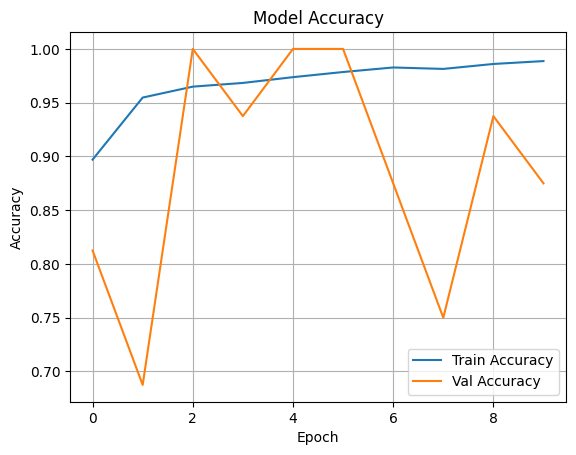

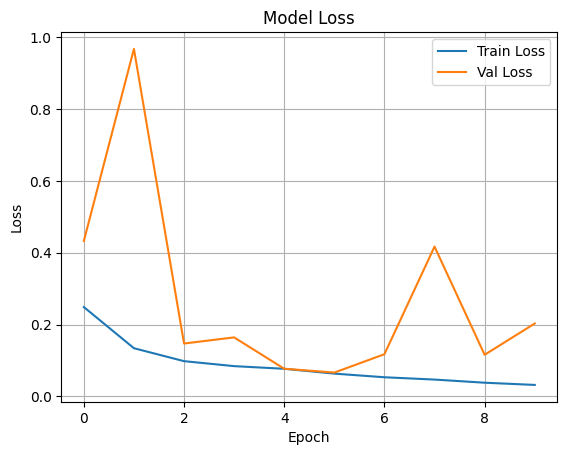

In [ ]:
# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


In [ ]:
model.save('/content/drive/MyDrive/Capstone_Project/chest_xray_cnn_model.h5')
print("✅ Model saved to Drive!")


✅ Model saved to Drive!


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras.models import load_model


In [ ]:
model_path = '/content/drive/MyDrive/Capstone_Project/chest_xray_cnn_model.h5'
model = load_model(model_path)

# Dataset paths
base_path = '/content/drive/MyDrive/Capstone_Project/chest_xray'
test_dir = os.path.join(base_path, 'test')


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = (150, 150)
BATCH_SIZE = 32

test_gen = ImageDataGenerator(rescale=1./255)

test_data = test_gen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)


Found 624 images belonging to 2 classes.


In [ ]:
# Get predicted probabilities
pred_probs = model.predict(test_data)
pred_classes = (pred_probs > 0.5).astype("int32").flatten()
true_classes = test_data.classes
class_labels = list(test_data.class_indices.keys())

# Print classification report
print("📄 Classification Report:\n")
print(classification_report(true_classes, pred_classes, target_names=class_labels))


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/20 ━━━━━━━━━━━━━━━━━━━━ 117s 6s/step
📄 Classification Report:

              precision    recall  f1-score   support

      NORMAL       0.97      0.28      0.44       234
   PNEUMONIA       0.70      0.99      0.82       390

    accuracy                           0.73       624
   macro avg       0.83      0.64      0.63       624
weighted avg       0.80      0.73      0.68       624



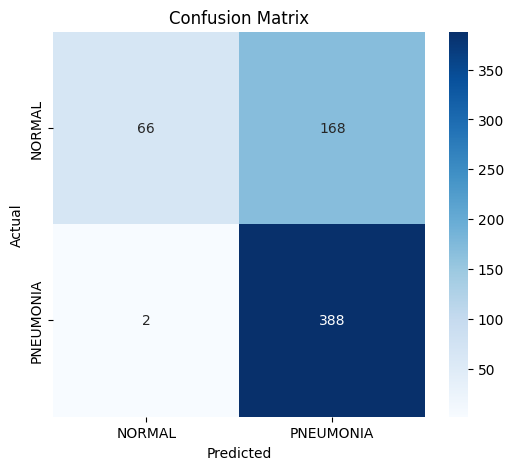

In [ ]:
cm = confusion_matrix(true_classes, pred_classes)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step


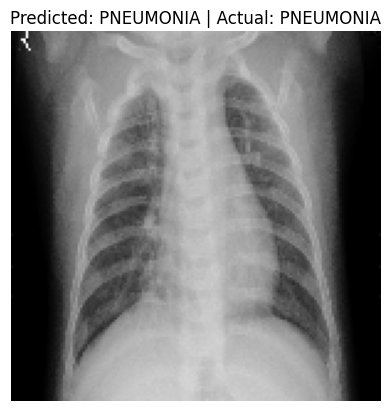

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step


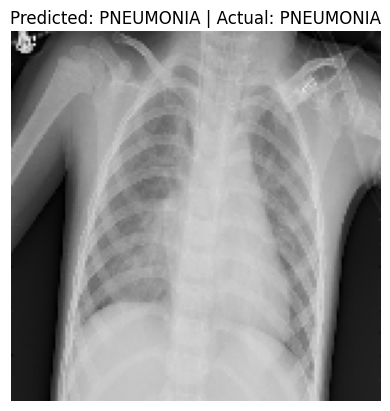

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


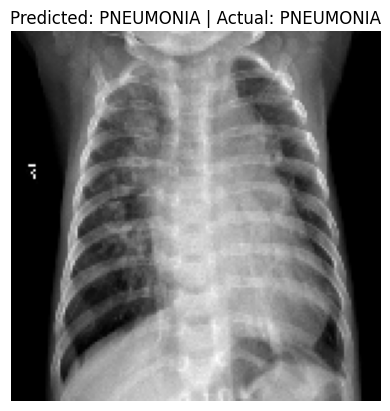

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


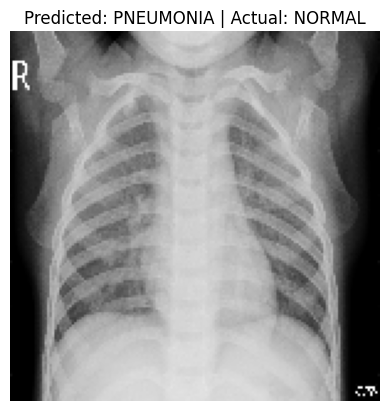

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


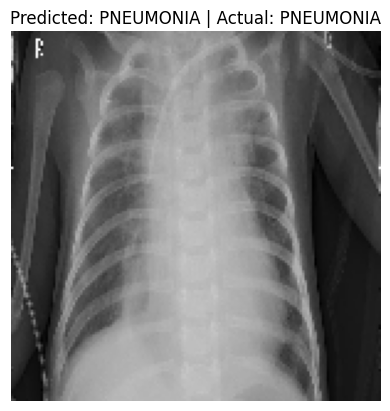

In [ ]:
# Get file paths
file_paths = test_data.filepaths

# Display some correct and incorrect predictions
import random

for i in range(5):
    index = random.randint(0, len(file_paths)-1)
    img = tf.keras.preprocessing.image.load_img(file_paths[index], target_size=IMG_SIZE)
    img_array = tf.keras.preprocessing.image.img_to_array(img) / 255.0
    pred = model.predict(img_array[np.newaxis, ...])[0][0]
    label = "PNEUMONIA" if pred > 0.5 else "NORMAL"
    actual = "PNEUMONIA" if true_classes[index] == 1 else "NORMAL"

    plt.imshow(img, cmap='gray')
    plt.title(f"Predicted: {label} | Actual: {actual}")
    plt.axis('off')
    plt.show()


20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 742ms/step


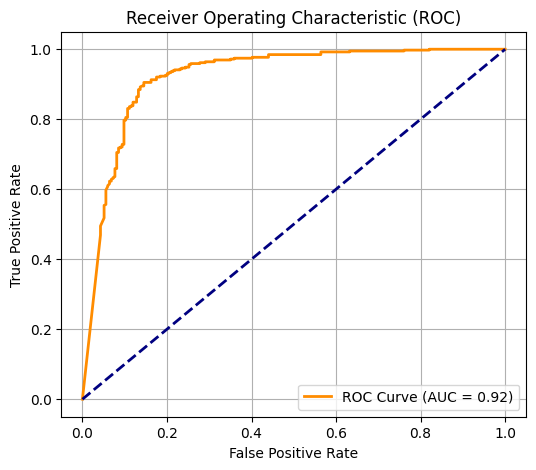

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# True labels and predicted probabilities
y_true = test_data.classes
y_pred = model.predict(test_data).ravel()

# Compute ROC and AUC
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 743ms/step


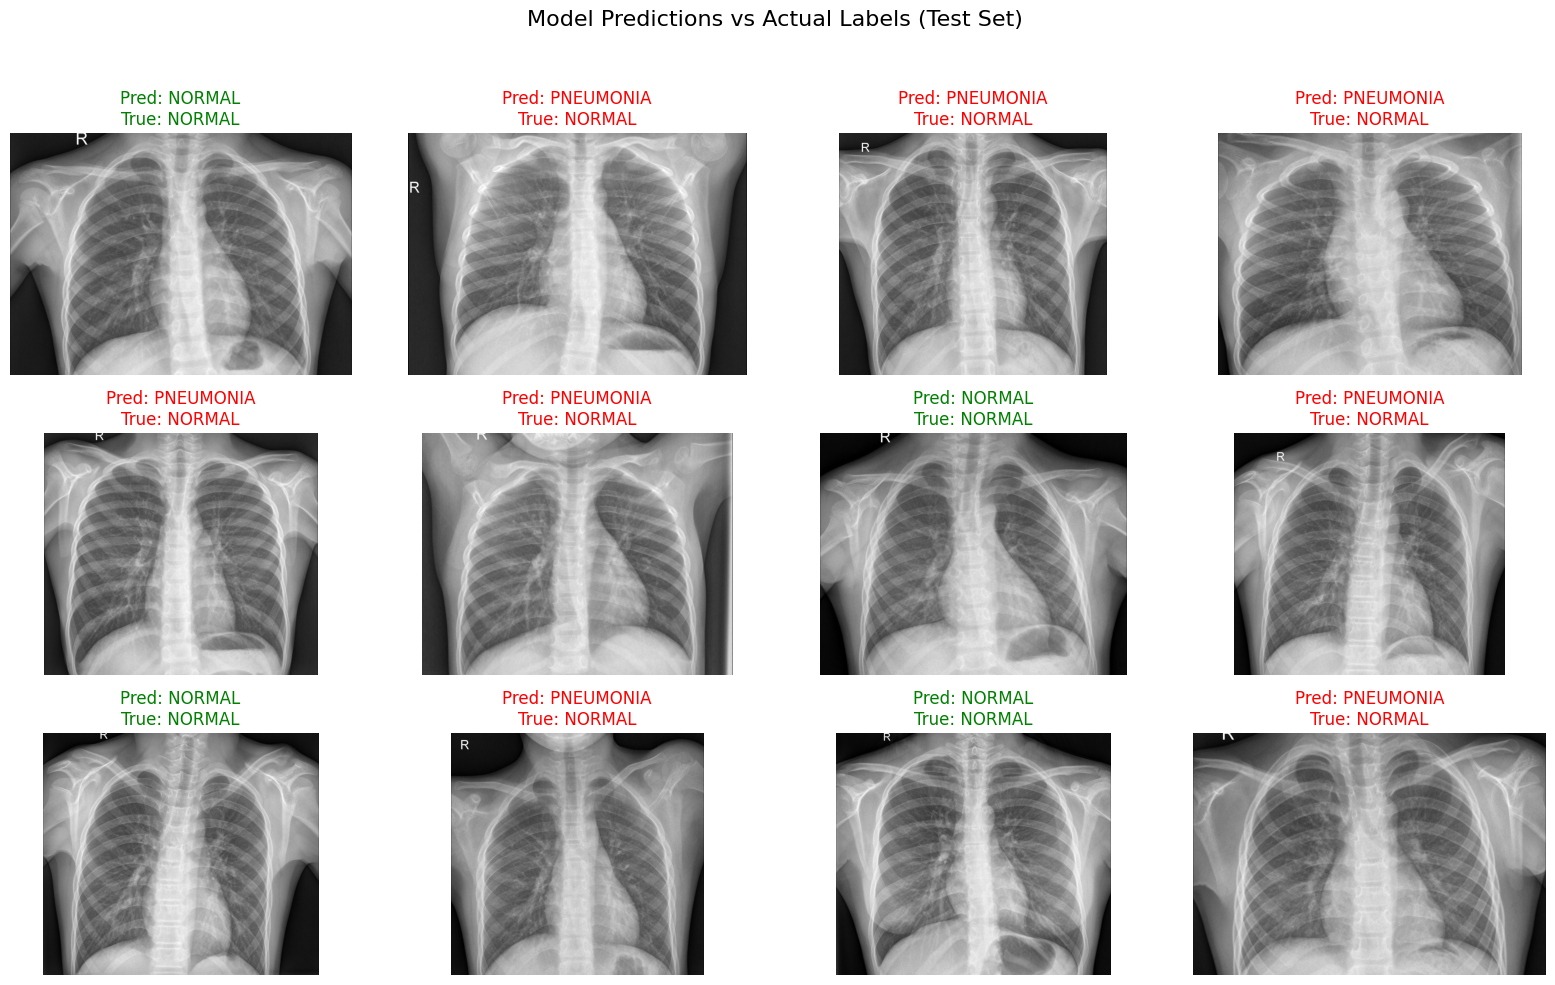

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get class labels (assuming binary classification with 0 = NORMAL, 1 = PNEUMONIA)
class_labels = ['NORMAL', 'PNEUMONIA']

# Get predictions from model
pred_probs = model.predict(test_data)
pred_classes = (pred_probs > 0.5).astype(int).reshape(-1)  # Convert probabilities to class labels

# Get true labels and file paths
true_classes = test_data.classes
file_paths = test_data.filepaths

# Plot a grid of images with predicted and actual labels
num_images = 12  # You can change this
plt.figure(figsize=(16, 10))

for i in range(num_images):
    img = plt.imread(file_paths[i])
    plt.subplot(3, 4, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f"Pred: {class_labels[pred_classes[i]]}\nTrue: {class_labels[true_classes[i]]}",
              color='green' if pred_classes[i] == true_classes[i] else 'red')
    plt.axis('off')

plt.suptitle('Model Predictions vs Actual Labels (Test Set)', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
